In [12]:
# Step 1 - Dataset Preparation
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [13]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Split the dataset into training (80%) and testing (20%) sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [14]:

# Normalize pixel values to be between 0 and 1
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

In [15]:
# Step 2 - Model Architecture and Training
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/10
750/750 [==============================] - 16s 20ms/step - loss: 0.3249 - accuracy: 0.9025 - val_loss: 0.1036 - val_accuracy: 0.9700
Epoch 2/10
750/750 [==============================] - 14s 19ms/step - loss: 0.1293 - accuracy: 0.9617 - val_loss: 0.0683 - val_accuracy: 0.9797
Epoch 3/10
750/750 [==============================] - 15s 19ms/step - loss: 0.0955 - accuracy: 0.9712 - val_loss: 0.0587 - val_accuracy: 0.9826
Epoch 4/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0770 - accuracy: 0.9770 - val_loss: 0.0530 - val_accuracy: 0.9843
Epoch 5/10
750/750 [==============================] - 20s 26ms/step - loss: 0.0675 - accuracy: 0.9791 - val_loss: 0.0489 - val_accuracy: 0.9858
Epoch 6/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0539 - accuracy: 0.9840 - val_loss: 0.0470 - val_accuracy: 0.9868
Epoch 7/10
750/750 [==============================] - 19s 25ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0461 - val_accuracy:

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.9856
Test accuracy: 0.9855999946594238


In [48]:
# Check for Underfitting and Overfitting (added section)
if min(history.history['val_loss']) > 0.2:
    print("CNN model may be underfitting. Validation loss is relatively high.")
elif history.history['loss'][-1] > 0.2 and history_cnn.history['val_loss'][-1] > 0.2:
    print("CNN model may be overfitting. Training and validation loss are both relatively high.")
else:
    print("No Underfitting or Overfitting Detected!")

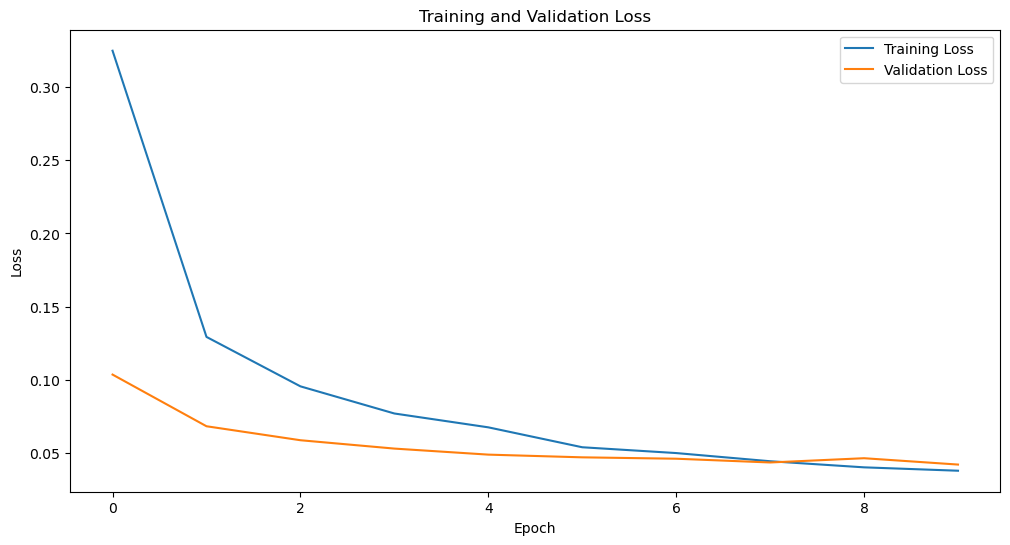

In [38]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

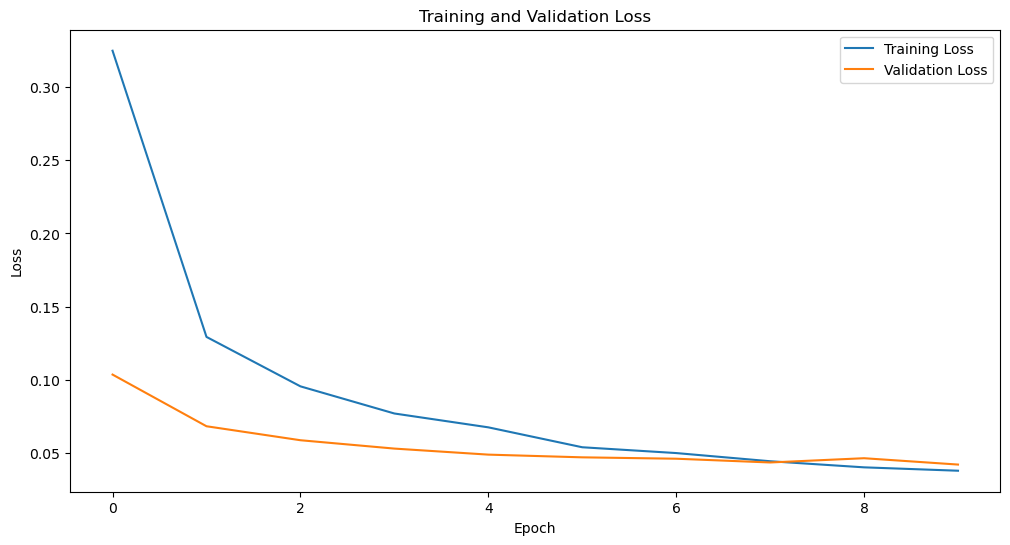

In [39]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## VGG19 for Transfer Learning with MINST

In [19]:
# Using VGG19 for Transfer Learning with MNIST
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

In [20]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Resize images to (48, 48) and simulate RGB channels
x_train = [cv2.cvtColor(cv2.resize(image, (48, 48)), cv2.COLOR_GRAY2RGB) for image in x_train]
x_test = [cv2.cvtColor(cv2.resize(image, (48, 48)), cv2.COLOR_GRAY2RGB) for image in x_test]

In [21]:
# Convert to NumPy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [22]:
# Preprocess pixel values to be in the range [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [23]:
# Load the pre-trained VGG19 model (without the top classification layer)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the convolutional layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

In [25]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

In [26]:
vgg_model = Model(inputs=base_model.input, outputs=output)

In [27]:
# Compile the model
vgg_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
# Train the model
history_vgg = vgg_model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/3
750/750 [==============================] - 329s 437ms/step - loss: 0.5837 - accuracy: 0.8283 - val_loss: 0.2054 - val_accuracy: 0.9455
Epoch 2/3
750/750 [==============================] - 323s 431ms/step - loss: 0.2382 - accuracy: 0.9302 - val_loss: 0.1478 - val_accuracy: 0.9556
Epoch 3/3
750/750 [==============================] - 325s 434ms/step - loss: 0.1822 - accuracy: 0.9465 - val_loss: 0.1214 - val_accuracy: 0.9635


In [29]:
# Evaluate the model on the test set
test_loss, test_accuracy = vgg_model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 50s 159ms/step - loss: 0.1139 - accuracy: 0.9643
Test accuracy: 0.9642999768257141


In [49]:
# Check for Underfitting and Overfitting (added section)
if min(history_vgg.history['val_loss']) > 0.2:
    print("CNN model may be underfitting. Validation loss is relatively high.")
elif history_vgg.history['loss'][-1] > 0.2 and history_cnn.history['val_loss'][-1] > 0.2:
    print("CNN model may be overfitting. Training and validation loss are both relatively high.")
else:
    print("No Underfitting or Overfitting Detected!")

No Underfitting or Overfitting Detected!


In [30]:
#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [32]:
# Evaluate CNN model
cnn_predictions = vgg_model.predict(x_test)
cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)
cnn_true_labels = y_test

313/313 [==============================] - 55s 174ms/step


In [33]:
# Evaluate Transfer Learning model
tl_predictions = vgg_model.predict(x_test)
tl_predicted_labels = np.argmax(tl_predictions, axis=1)
tl_true_labels = y_test

313/313 [==============================] - 57s 182ms/step


In [34]:
# Calculate evaluation metrics
cnn_report = classification_report(cnn_true_labels, cnn_predicted_labels)
tl_report = classification_report(tl_true_labels, tl_predicted_labels)

# Print classification reports
print("CNN Model:")
print(cnn_report)
print("\nTransfer Learning Model (VGG19):")
print(tl_report)

CNN Model:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.94      0.95      1032
           3       0.95      0.98      0.97      1010
           4       0.95      0.98      0.96       982
           5       0.96      0.94      0.95       892
           6       0.96      0.97      0.97       958
           7       0.94      0.96      0.95      1028
           8       0.96      0.95      0.95       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000


Transfer Learning Model (VGG19):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.94

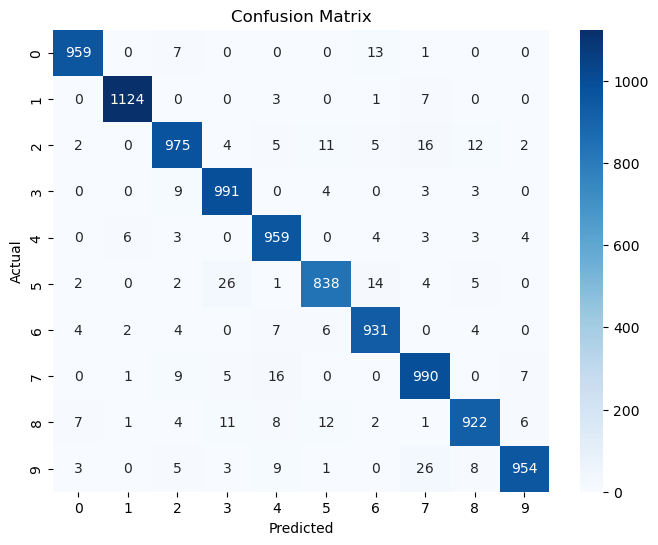

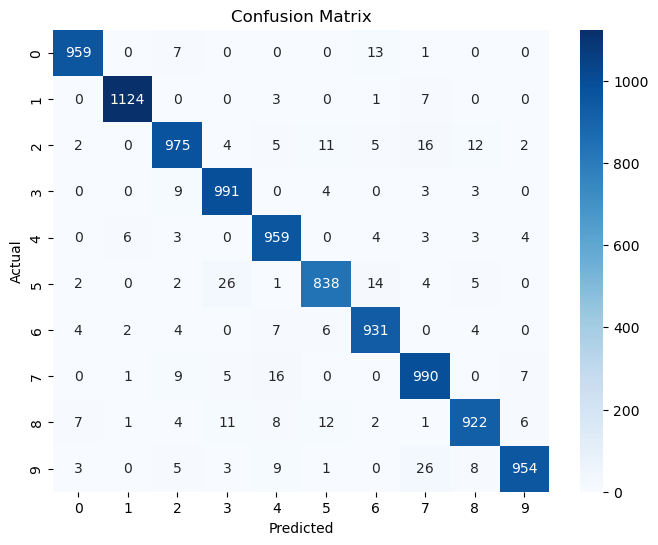

In [35]:
# Plot confusion matrices
plot_confusion_matrix(cnn_true_labels, cnn_predicted_labels, labels=np.arange(10))
plot_confusion_matrix(tl_true_labels, tl_predicted_labels, labels=np.arange(10))

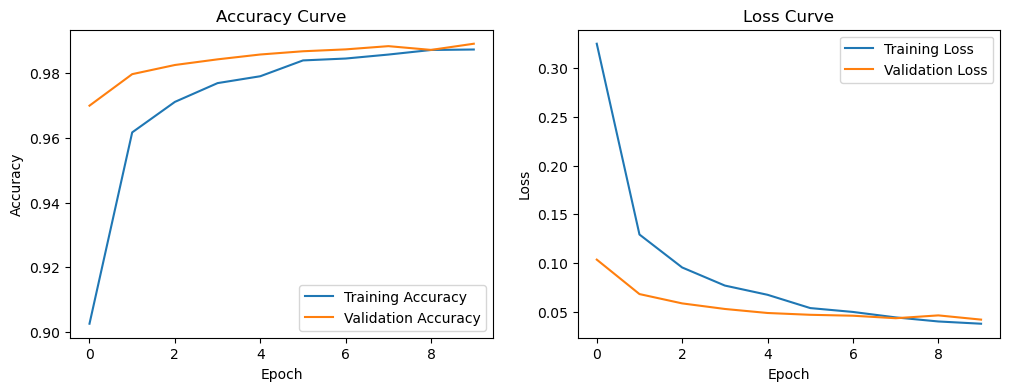

In [36]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.show()
